In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,8907500070,20150413T000000,5350000,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [3]:
df.isnull().sum()   

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
col_to_drop = ['id', 'date']
df = df.drop(columns=col_to_drop,axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [12]:
X = df.drop(columns=['price'])
y = df['price']

In [9]:
# x_columns = X.columns
# for i in range (0, x_columns.shape[0]):
#     y = x_columns[i]
#     x_others = x_columns.drop(x_columns[i])
#     linear = LinearRegression()
#     linear.fit(X[x_others], X[y])
#     rsq = r2_score(X[y], linear.predict(X[x_others]))
#     try:
#         vif = round(1 / (1 - rsq), 2)
#     except ZeroDivisionError:
#         vif = float("inf")
#     print(y, "VIF :", vif)

df.shape

(21613, 19)

In [13]:
# Ensure X and y are correctly defined
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One decision tree regressor 
dt_regressor = DecisionTreeRegressor(max_depth=5)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 40657756220.29475
R-squared: 0.7012263567330419


In [15]:
print("=== REGRESSION EVALUATION METRICS ===\n")

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"1. Mean Absolute Error (MAE): {mae:.2f} lakh NPR")
print("   - Average absolute difference between actual and predicted prices")

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\n2. Mean Squared Error (MSE): {mse:.2f}")
print("   - Average of squared differences (penalizes large errors more)")

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"\n3. Root Mean Squared Error (RMSE): {rmse:.2f} lakh NPR")
print("   - Square root of MSE, same unit as target variable")

# 4. R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"\n4. R-squared (R²): {r2:.4f}")
print(f"   - Proportion of variance explained: {r2*100:.2f}%")

# 5. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"\n5. Mean Absolute Percentage Error (MAPE): {mape:.4f} ({mape*100:.2f}%)")
print("   - Average percentage error")

# 6. Custom metrics
residuals = np.array(y_test) - np.array(y_pred)
print(f"\n6. Additional Metrics:")
print(f"   - Max Absolute Error: {np.max(np.abs(residuals)):.2f} lakh NPR")
print(f"   - Min Absolute Error: {np.min(np.abs(residuals)):.2f} lakh NPR")
print(f"   - Standard Deviation of Residuals: {np.std(residuals):.2f}")

# 7. Accuracy within tolerance
tolerance_5_percent = np.mean(np.abs(residuals) <= 0.05 * np.array(y_test)) * 100
tolerance_10_percent = np.mean(np.abs(residuals) <= 0.10 * np.array(y_test)) * 100
print(f"   - Predictions within 5% of actual: {tolerance_5_percent:.1f}%")
print(f"   - Predictions within 10% of actual: {tolerance_10_percent:.1f}%")

=== REGRESSION EVALUATION METRICS ===

1. Mean Absolute Error (MAE): 112694.58 lakh NPR
   - Average absolute difference between actual and predicted prices

2. Mean Squared Error (MSE): 40657756220.29
   - Average of squared differences (penalizes large errors more)

3. Root Mean Squared Error (RMSE): 201637.69 lakh NPR
   - Square root of MSE, same unit as target variable

4. R-squared (R²): 0.7012
   - Proportion of variance explained: 70.12%

5. Mean Absolute Percentage Error (MAPE): 0.2121 (21.21%)
   - Average percentage error

6. Additional Metrics:
   - Max Absolute Error: 4558750.00 lakh NPR
   - Min Absolute Error: 8.62 lakh NPR
   - Standard Deviation of Residuals: 201637.12
   - Predictions within 5% of actual: 19.3%
   - Predictions within 10% of actual: 35.9%


In [16]:
print("\n=== DETAILED COMPARISON ===")
print("House | Actual | Predicted | Error | Error%")
print("-" * 45)
for i, (actual, pred) in enumerate(zip(y_test, y_pred), 1):
    error = actual - pred
    error_pct = (abs(error) / actual) * 100
    total_errpct =+ error_pct
    print(f"{i:5d} | {actual:6.2f} | {pred:9.2f} | {error:5.2f} | {error_pct:5.1f}%")
print(f"Total Error Percentage: {total_errpct:.2f}%")


=== DETAILED COMPARISON ===
House | Actual | Predicted | Error | Error%
---------------------------------------------
    1 | 1325000.00 | 893791.91 | 431208.09 |  32.5%
    2 | 813000.00 | 695968.41 | 117031.59 |  14.4%
    3 | 718000.00 | 695968.41 | 22031.59 |   3.1%
    4 | 321000.00 | 271604.57 | 49395.43 |  15.4%
    5 | 230000.00 | 338302.82 | -108302.82 |  47.1%
    6 | 1095000.00 | 695968.41 | 399031.59 |  36.4%
    7 | 260000.00 | 338302.82 | -78302.82 |  30.1%
    8 | 248500.00 | 240101.42 | 8398.58 |   3.4%
    9 | 225000.00 | 240101.42 | -15101.42 |   6.7%
   10 | 568000.00 | 377681.99 | 190318.01 |  33.5%
   11 | 885000.00 | 695968.41 | 189031.59 |  21.4%
   12 | 389950.00 | 338302.82 | 51647.18 |  13.2%
   13 | 338000.00 | 324715.01 | 13284.99 |   3.9%
   14 | 550000.00 | 893791.91 | -343791.91 |  62.5%
   15 | 305000.00 | 240101.42 | 64898.58 |  21.3%
   16 | 650000.00 | 695968.41 | -45968.41 |   7.1%
   17 | 599950.00 | 1236878.57 | -636928.57 | 106.2%
   18 | 415000.

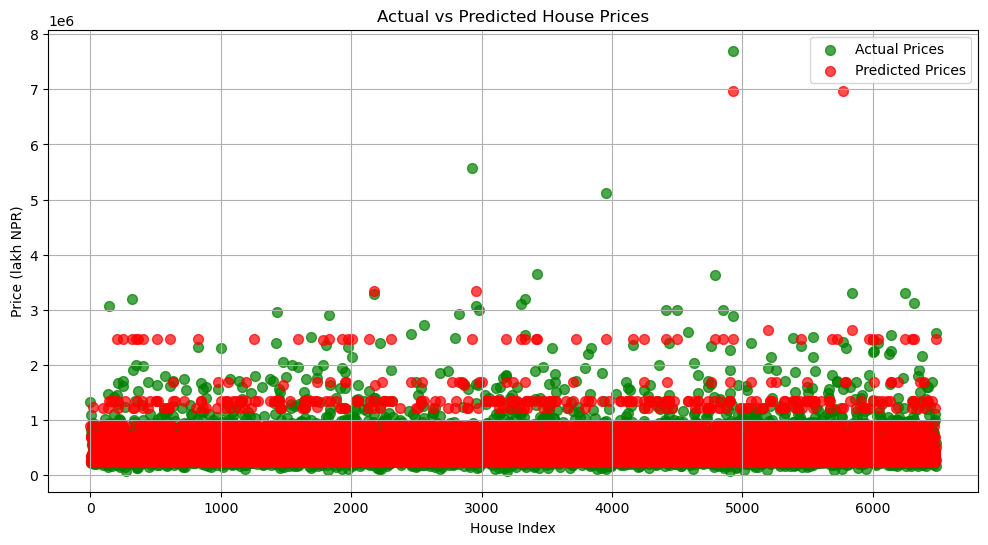

In [21]:
plt.figure(figsize=(12, 6))

# Create x-axis positions for each house
x_pos = range(len(y_test))

plt.scatter(x_pos, y_test, color='green', alpha=0.7, label='Actual Prices', s=50)
plt.scatter(x_pos, y_pred, color='red', alpha=0.7, label='Predicted Prices', s=50)

plt.xlabel('House Index')
plt.ylabel('Price (lakh NPR)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid()
plt.show()

In [18]:
print(f"\n=== INTERPRETATION ===")
print(f"• Lower MAE/RMSE = Better model")
print(f"• R² closer to 1 = Better model (yours: {r2:.3f})")
print(f"• Lower MAPE = Better model (yours: {mape*100:.1f}%)")
if r2 > 0.8:
    print(f"• Your model shows GOOD performance (R² > 0.8)")
elif r2 > 0.6:
    print(f"• Your model shows MODERATE performance (R² > 0.6)")
else:
    print(f"• Your model might need improvement (R² < 0.6)")


=== INTERPRETATION ===
• Lower MAE/RMSE = Better model
• R² closer to 1 = Better model (yours: 0.701)
• Lower MAPE = Better model (yours: 21.2%)
• Your model shows MODERATE performance (R² > 0.6)


# Using bagging concept 

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n = 100
models = []
bootstrap_X = []
bootstrap_y = []

# creating fockinggg 5 bootstrap samples
for i in range(n):
    bootstrap_indices = np.random.choice(range(len(X_train)), size=len(y_train), replace=True)
    x_boot = X_train.iloc[bootstrap_indices]
    y_boot = y_train.iloc[bootstrap_indices]

    bootstrap_X.append(x_boot)
    bootstrap_y.append(y_boot)

    #train model 
    bagging_model = DecisionTreeRegressor(max_depth=7)
    bagging_model.fit(x_boot, y_boot)
    models.append(bagging_model)

    # Example: test on original data and average the predictions
preds = np.zeros(len(X_test))  


for model in models:
    preds += model.predict(X_test) / len(models)  # average predictions 

        # evaluation 
    mse = mean_squared_error(y_test, preds)
    r2_bagging = r2_score(y_test, preds)

print(f"Model {i+1} - Mean Squared Error: {mse}, R^2 Score: {r2}")


print("Average prediction: ", preds.mean())


Model 100 - Mean Squared Error: 19558254928.336845, R^2 Score: 0.7012263567330419
Average prediction:  534557.4899099463
